# <u><b> Objective : This task requires you to build text clusters and report whether these clusters make sense. </b></u>

* ###  For this clustering project on text, you will use a dataset named 20newsgroup. This is available in sklearn.datasets. You can use the code given below in the code cells to fetch the data.

* ### Next you need to run a TFIDFVectorizer on the sentences to obtain a document-word sparse matrix. Use this array as your $X$.

* ### Once you have got your array, you can apply different clustering techniques such as K-Means clustering and Hierarchical clustering to obtain meaningful clusters. Check if these clusters seem relevant and well separated. 

* ### Finally you can use dimensionality reduction technqiues such as PCA or t-SNE(you can read about it and use it straight away) to come up with two dimensional visualization of these clusters. 







In [ ]:
# we will be importing data set from the sklearn
from sklearn.datasets import fetch_20newsgroups

In [ ]:
# by mentioning remove we will be sorting text 
dataset = fetch_20newsgroups(download_if_missing=True,remove = ('headers', 'footers', 'quotes'),subset='train')

In [ ]:
news_list = dataset.data

In [ ]:
news_list[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.DataFrame({'text' : news_list})

In [ ]:
df.head()

,text
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."


In [ ]:
df.shape

(11314, 1)

In [ ]:
import re
import string
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [ ]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
df['text'] = df.text.map(alphanumeric).map(punc_lower)

In [ ]:
# we are  transfering token text by applying vecttorization on it 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 
X_tfidfV = tfidfV.fit_transform(df.text)
# print the dimensions of the training set (text messages, terms) 
print(X_tfidfV.shape)
print(type(X_tfidfV))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
X_new = X_tfidfV.toarray()

In [ ]:
X_new.shape

(11314, 67822)

In [ ]:
# because of the so many columns we are making the diffrent df for diffrent columns 
df2 = pd.DataFrame(X_new[:,0:10000])
df3 = pd.DataFrame(X_new[:,10000:20000])
df4 = pd.DataFrame(X_new[:,20000:30000])
df5 = pd.DataFrame(X_new[:,30000:40000])
df6 = pd.DataFrame(X_new[:,40000:50000])
df7 = pd.DataFrame(X_new[:,50000:60000])
df8 = pd.DataFrame(X_new[:,60000:67822])

In [ ]:
df3.shape

(11314, 10000)

In [ ]:
list_of_df = [df2,df3,df4,df5,df6,df7,df8]

In [ ]:
# we are extracting pca from each df
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca_1 = pca.fit_transform(df2)
X_pca_2 = pca.fit_transform(df3)
X_pca_3 = pca.fit_transform(df4)
X_pca_4 = pca.fit_transform(df5)
X_pca_5 = pca.fit_transform(df6)
X_pca_6 = pca.fit_transform(df7)
X_pca_7 = pca.fit_transform(df8)
#print("original shape:   ", X_new.shape)
#print("transformed shape:", X_pca.shape)

In [ ]:
pca.components_

array([[ 7.32918261e-04, -2.11201524e-03, -8.38396474e-05, ...,
        -5.88579739e-05, -1.33401505e-04, -3.00519810e-04]])

In [ ]:
pca.explained_variance_

array([0.001261])

In [ ]:
final_array = np.concatenate((X_pca_1,X_pca_2,X_pca_3,X_pca_4,X_pca_5,X_pca_6,X_pca_7),axis = 1)

In [ ]:
final_array.shape

(11314, 7)

In [ ]:
type(X_pca_1)
print(X_pca_1.shape)

(11314, 1)


In [ ]:
# lets try the clustering with the help of k mean 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# fitting and predicting cluster via k mean with  pca 
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(final_array)
    centers = clusterer.cluster_centers_

    score = silhouette_score(final_array, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5757754477498063
For n_clusters = 3, silhouette score is 0.5918951860687812
For n_clusters = 4, silhouette score is 0.5875648131043798
For n_clusters = 5, silhouette score is 0.3717373209252955
For n_clusters = 6, silhouette score is 0.38682283352772007
For n_clusters = 7, silhouette score is 0.3763469844996019
For n_clusters = 8, silhouette score is 0.396229436275437
For n_clusters = 9, silhouette score is 0.4017130355877693
For n_clusters = 10, silhouette score is 0.3279820749190144
For n_clusters = 11, silhouette score is 0.33009304910605836
For n_clusters = 12, silhouette score is 0.3359361437942015
For n_clusters = 13, silhouette score is 0.34007152831883913
For n_clusters = 14, silhouette score is 0.34235973392893293
For n_clusters = 15, silhouette score is 0.3440149689596665


In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f248b89ad10>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), locate_elbow=False,
                 timings=False)

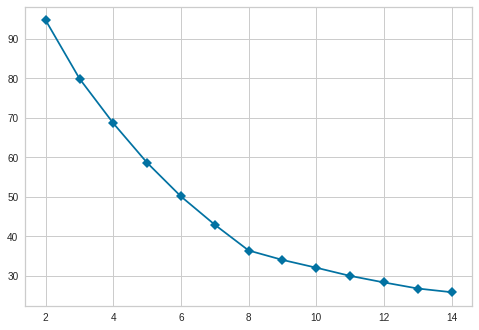

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(clusterer, k=(2,15), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(final_array)        # Fit the data to the visualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f24929d5990>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), locate_elbow=False,
                 timings=False)

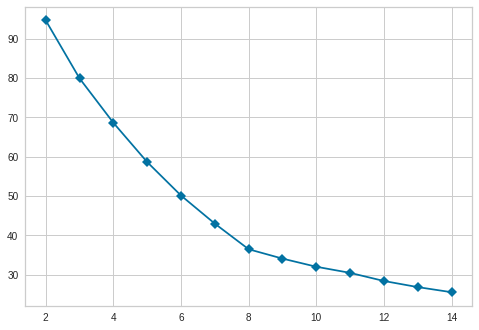

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(clusterer, k=(2,15), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(final_array)        # Fit the data to the visualizer

In [ ]:
from sklearn.cluster import AgglomerativeClustering

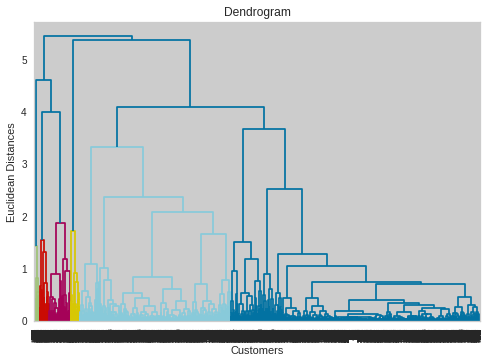

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(final_array, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

we can see  8 is no of best cluster we can see thet from the all the graph